In [1]:
import pandas as pd
from math import log
import numpy as np
import matplotlib.pyplot as plt

In [2]:
url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv'
covidCasesRaw = pd.read_csv(url)

In [3]:
covidCasesTransformed = covidCasesRaw.drop(columns=['fips'])
covidCasesTransformed['country'] = 'USA'
covidCasesTransformed['county'] = covidCasesTransformed.county + ', ' + covidCasesTransformed.state
covidCasesTransformed = covidCasesTransformed.set_index(['country','state','county','date']).sort_index()
covidCasesByCounty = covidCasesTransformed.copy().droplevel(['country','state'])
covidCasesByState = covidCasesTransformed.groupby(['state','date']).sum()
covidCasesWholeCountry = covidCasesTransformed.groupby(['country','date']).sum()
covidCases = covidCasesWholeCountry.append(covidCasesByState).append(covidCasesByCounty)
covidCases.index.names = ['location','date']

In [4]:
def getDeathRate(deaths, cases): 
    if cases <= 0: return np.NaN 
    else: return deaths / cases

crudeDeathRate = covidCases.apply(lambda row: getDeathRate(row.deaths,row.cases), axis = 1)

changes = covidCases.groupby('location').diff(1)

pctChanges = covidCases.groupby('location').pct_change(1)

def getDoublingTimeFromPctChange(pctChange): 
    if pctChange <= 0: return np.NaN
    if pctChange == np.Inf: return np.NaN
    else:  return log(2) / log(1+pctChange)

doublingTimes = pctChanges.applymap(getDoublingTimeFromPctChange)

In [5]:
def plotLocation(location):
    casePlot = covidCases.loc[location].plot(logy=True)
    casePlot.set_title('Cases, Deaths, and Death Rate')
    casePlot.set_ylabel('Cases & Deaths')
    crudeDeathRate.loc[location].plot(secondary_y=True, label = 'death rate')
    casePlot.right_ax.set_ylabel('Death Rate')
    changePlot = changes.loc[location].plot(secondary_y=['deaths'])
    changePlot.set_ylabel('New Cases')
    changePlot.right_ax.set_ylabel('New Deaths')
    pctChangePlot = pctChanges.loc[location].rolling(3).mean().plot()
    pctChangePlot.set_ylabel('Percent Change')
    doublingTimePlot = doublingTimes.loc[location].rolling(3).mean().plot()
    doublingTimePlot.invert_yaxis()
    doublingTimePlot.set_ylabel('Doubling Time (Days)')
    return location

'New York'

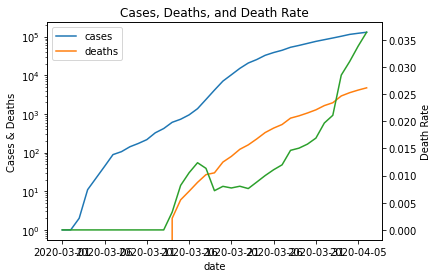

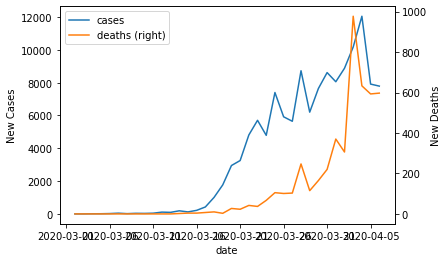

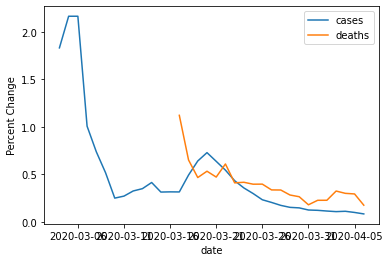

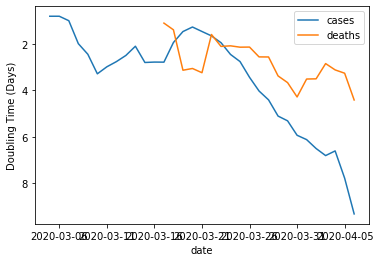

In [6]:
location = 'New York'
plotLocation(location)